In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import random
import matplotlib.pyplot as plt
import time

In [ ]:
#Feature extraction is to transform image into list of features using grid technique 
def feature_extraction(x_path,y_path):
  x_array=[] # 2d list to keep features of transformed images
  y_array=[] #list to keep track of y labels
  trainlabel_file=open(y_path,"r")
  for line in trainlabel_file:
      y_array.append(int(line.rstrip()))
  xfile=open(x_path,"r")
  num_lines=0
  xfile_list=[]
  for line in xfile:
    num_lines=num_lines+1
    xfile_list.append(line)
  
  for i in range(0,num_lines,28):
      xi_feature=[]
      row_count=i
      for j in range(7): # Taking 4x4 grids
          ind_col_count=0
          white_count=0
          col=0
          while(col<7):
              white_count=0
              old_colcount=ind_col_count
              for k in range(row_count,row_count+4):
                  ind_col_count=old_colcount
                  for l in range (old_colcount,old_colcount+4):
                      if(xfile_list[k][l]==' '):
                          ind_col_count=ind_col_count+1
                          white_count=white_count+1 # taking white cells into count
                      else:
                          ind_col_count=ind_col_count+1
              xi_feature.append(round((white_count/16)*10))
              col=col+1
          row_count=row_count+4
      x_array.append(xi_feature)
  return x_array,y_array

In [ ]:
X_features,Y_labels=feature_extraction("/Users/rohithgummadi/Desktop/AI_Project/digitdata/trainingimages","/Users/rohithgummadi/Desktop/AI_Project/digitdata/traininglabels")


In [ ]:
print(len(X_features))

5000


In [ ]:
Xvalidation_features,Yvalidation_labels=feature_extraction("/Users/rohithgummadi/Desktop/AI_Project/digitdata/validationimages","/Users/rohithgummadi/Desktop/AI_Project/digitdata/validationlabels")


In [ ]:
Xtest_features,Ytest_labels=feature_extraction("/Users/rohithgummadi/Desktop/AI_Project/digitdata/testimages","/Users/rohithgummadi/Desktop/AI_Project/digitdata/trainingimages")


In [ ]:
print(len(Yvalidation_labels))
print(len(Ytest_labels))

1000
1000


In [ ]:
#Predicting validation data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_features, Y_labels)
test_completion_labels=knn.predict(Xvalidation_features)
print(test_completion_labels)

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 1 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 9 4 6 4 3 0 7 0 2 7
 1 7 3 2 9 7 7 6 2 7 5 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 9 8
 1 3 9 7 9 4 4 9 2 5 4 7 6 4 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 2 1 7 1 8 2
 0 2 9 8 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 1 1 8 1 8 1 8 5 0 8
 9 2 5 0 1 1 1 0 9 0 3 1 6 9 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 6 5 3 7 2
 2 7 1 2 8 6 1 7 3 3 8 9 7 9 2 2 4 1 5 8 8 4 2 3 0 6 4 2 9 1 9 5 7 7 2 6 2
 0 8 5 7 7 9 1 0 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4 1 5 8 2 9 2 0 4
 0 0 2 8 6 7 1 2 4 0 2 7 4 3 3 0 0 3 1 9 6 5 3 5 7 7 9 3 0 4 6 0 7 1 1 2 1
 5 3 3 9 7 8 6 5 4 1 3 8 1 0 5 1 7 1 5 0 6 1 8 5 1 7 9 4 6 2 2 5 0 6 5 6 3
 7 2 0 8 8 5 4 1 1 4 0 7 3 7 6 1 6 2 1 9 2 8 6 1 9 5 2 5 4 4 2 8 3 8 8 4 5
 0 3 1 7 7 3 7 9 7 1 9 2 1 4 2 9 2 0 4 9 1 4 8 1 8 9 5 9 7 8 3 7 6 0 0 3 0
 8 0 6 4 8 3 3 3 2 3 9 1 2 6 8 0 9 6 6 6 9 8 8 2 9 5 8 9 6 1 8 4 1 2 6 3 1
 9 7 5 4 0 8 9 9 1 0 5 2 

In [ ]:
acc_count=0
for i in range(len(test_completion_labels)):
  if(test_completion_labels[i]==Yvalidation_labels[i]):
    acc_count+=1
print("Accuracy_count", acc_count)
print("Accuracy for test data",(acc_count/len(test_completion_labels))*100)

Accuracy_count 905
Accuracy for test data 90.5


In [ ]:
#Predicting testing data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_features, Y_labels)
test_completion_labels=knn.predict(Xtest_features)
print(test_completion_labels)

[9 0 2 3 1 9 7 8 1 0 4 1 9 9 2 4 2 6 8 1 3 7 9 4 9 1 8 1 3 8 1 2 5 8 0 6 2
 1 1 1 1 5 3 4 9 9 5 0 9 2 0 4 9 2 1 7 2 4 9 4 4 0 9 9 2 2 3 3 4 3 5 7 3 5
 8 1 2 4 4 6 4 9 5 1 0 6 9 5 9 0 9 7 3 8 0 3 7 1 3 6 7 3 5 9 7 9 6 5 6 3 7
 4 6 5 8 5 4 7 8 2 8 0 7 6 1 9 7 7 7 1 9 5 2 7 3 1 1 1 1 1 4 7 9 7 5 4 5 4
 0 8 3 6 9 6 0 2 9 9 4 9 4 6 6 4 7 9 5 4 5 5 5 7 3 9 2 7 0 2 0 1 1 1 8 9 1
 9 7 2 0 1 5 0 4 1 7 0 6 0 8 6 8 1 8 0 9 3 8 2 8 6 2 1 3 1 1 3 7 9 0 8 0 5
 4 0 2 8 2 2 9 8 4 0 4 5 8 5 1 2 1 5 1 7 4 6 7 2 0 5 8 8 6 2 5 4 1 9 2 1 5
 8 1 0 2 4 9 3 6 8 8 2 9 0 5 0 9 4 7 9 3 4 1 5 9 2 3 5 8 8 0 9 5 3 6 6 0 1
 6 0 3 7 4 9 1 2 9 1 4 6 9 9 7 9 5 4 4 3 1 8 1 0 8 7 9 4 8 8 1 9 7 1 4 5 6
 0 5 2 2 6 1 5 5 2 4 9 6 2 7 7 2 2 1 1 2 8 3 9 7 4 1 7 1 7 6 7 8 2 7 3 1 7
 5 8 2 6 2 2 5 6 6 0 9 2 4 3 3 9 7 6 6 8 0 4 1 3 8 2 9 1 8 0 6 7 2 1 0 5 1
 2 0 2 6 0 2 4 9 8 0 9 9 4 6 5 9 9 1 9 3 4 9 9 1 2 2 8 1 9 6 4 0 9 4 8 3 8
 6 0 2 6 1 9 6 2 9 9 0 9 6 0 6 2 5 4 2 7 8 4 5 9 0 3 8 5 3 5 8 6 5 7 6 3 3
 9 6 1 1 2 9 0 4 3 3 6 9 

In [ ]:
acc_count=0
for i in range(len(test_completion_labels)):
  if(test_completion_labels[i]==Ytest_labels[i]):
    acc_count+=1
print("Accuracy_count", acc_count)
print("Accuracy for test data",(acc_count/len(test_completion_labels))*100)

Accuracy_count 877
Accuracy for test data 87.7


In [ ]:
#Training samples function to calculate accuracy for different sample sizes 
def training_samples():
  percent_train=[10,20,30,40,50,60,70,80,90,100] # Taking different sample sizes
  accuracy_list=[]
  for ind in percent_train:
    data_points=int((ind/100)*len(X_features))
    indices_list=random.sample(range(0,len(X_features)),data_points)
    Xtrain_features=[]
    Ytrain_labels=[]
    for index in indices_list:
      Xtrain_features.append(X_features[index])
      Ytrain_labels.append(Y_labels[index])
    
    test_completion_output=[]
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(Xtrain_features, Ytrain_labels)  # Fitting Knn classifier with training data
    test_completion_output=knn.predict(Xtest_features)
    acc_count=0
    for i in range(len(test_completion_output)):
      if(test_completion_output[i]==Ytest_labels[i]):
        acc_count+=1
    accuracy=(acc_count/len(test_completion_output))*100
    print("Accuracy_count",acc_count)
    print(accuracy)
    accuracy_list.append(accuracy)

In [ ]:
training_samples()

Accuracy_count 784
78.4
Accuracy_count 833
83.3
Accuracy_count 832
83.2
Accuracy_count 853
85.3
Accuracy_count 859
85.9
Accuracy_count 865
86.5
Accuracy_count 860
86.0
Accuracy_count 870
87.0
Accuracy_count 873
87.3
Accuracy_count 877
87.7


In [ ]:
#cal_m_std function is to calculate mean and standard deviation of different sample sizes accuracies
percent_train=[10,20,30,40,50,60,70,80,90,100]
mean_list=[]
std_list=[]
time_list=[]
def calc_m_std():
  for ind in percent_train:
    accuracy_list=[]
    percent_timelist=[]
    for i in range(5):
      data_points=int((ind/100)*len(X_features))
      indices_list=random.sample(range(0,len(X_features)),data_points)
      Xtrain_features=[]
      Ytrain_labels=[]
      for index in indices_list:
        Xtrain_features.append(X_features[index])
        Ytrain_labels.append(Y_labels[index])
      
      test_completion_output=[]
      knn = KNeighborsClassifier(n_neighbors=5)
      start=time.time()
      knn.fit(Xtrain_features, Ytrain_labels)
      test_completion_output=knn.predict(Xtest_features)
      end=time.time()
      percent_timelist.append((end-start)*10**3)
      acc_count=0
      for i in range(len(test_completion_output)):
        if(test_completion_output[i]==Ytest_labels[i]):
          acc_count+=1
      accuracy=(acc_count/len(test_completion_output))*100
      accuracy_list.append(accuracy)
    
    time_list.append(np.average(percent_timelist))
    mean_list.append(np.average(accuracy_list))
    std_list.append(np.std(accuracy_list))
    print("Time taken for",ind,"% data is", percent_timelist)
    print("mean time for",ind,"% data is ",np.average(percent_timelist))
    print("accuracy_list for",ind,"% data is", accuracy_list) 
    print("mean accuracies for",ind,"% data is ",np.average(accuracy_list))# Mean of accuracies of sample data
    print("standard deviation of accuracies for",ind,"% data is",np.std(accuracy_list)) #Standard deviation of accuracies of sample data
    print("\n")
    


In [ ]:
calc_m_std()

Time taken for 10 % data is [71.41304016113281, 84.73658561706543, 62.927961349487305, 80.50942420959473, 71.79021835327148]
mean time for 10 % data is  74.27544593811035
accuracy_list for 10 % data is [77.60000000000001, 79.4, 75.9, 79.9, 80.5]
mean accuracies for 10 % data is  78.66
standard deviation of accuracies for 10 % data is 1.6859418732566063


Time taken for 20 % data is [95.65877914428711, 82.80253410339355, 98.62112998962402, 85.65402030944824, 97.7623462677002]
mean time for 20 % data is  92.09976196289062
accuracy_list for 20 % data is [84.5, 82.8, 82.39999999999999, 83.2, 81.3]
mean accuracies for 20 % data is  82.84
standard deviation of accuracies for 20 % data is 1.0442221985765308


Time taken for 30 % data is [121.10757827758789, 124.22323226928711, 121.28233909606934, 102.15473175048828, 100.76022148132324]
mean time for 30 % data is  113.90562057495117
accuracy_list for 30 % data is [82.89999999999999, 82.8, 84.5, 85.7, 85.39999999999999]
mean accuracies for 30 %

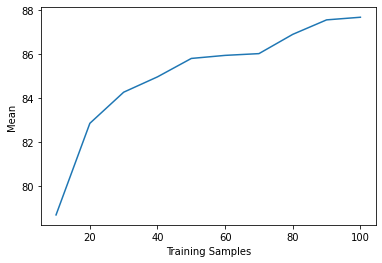

In [ ]:
plt.plot(percent_train,mean_list)
plt.xlabel("Training Samples")
plt.ylabel("Mean")
plt.show()

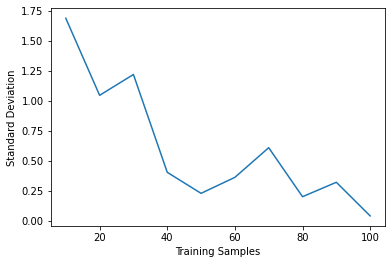

In [ ]:
plt.plot(percent_train,std_list)
plt.xlabel("Training Samples")
plt.ylabel("Standard Deviation")
plt.show()

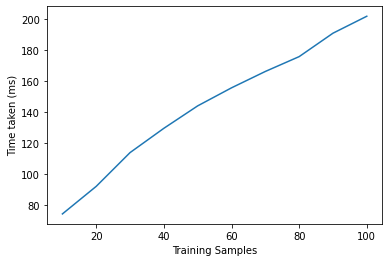

In [ ]:
plt.plot(percent_train,time_list)
plt.xlabel("Training Samples")
plt.ylabel("Time taken (ms)")
plt.show()